
<H1 style='text-align: CENTER;'>Optimización de ubicación de torres de transmisión eléctrica mediante técnicas de algoritmo genético y Big Data V1.0: </H1>
REALIZADO POR: FRANCISCO GUASUMBA

NOTA** EL CODIGO ESTA EJECUTADO POR BLOQUES, SE MUESTRA LA EJECUCION YA REALIZADA.


<p style='text-align: justify;'> En el presente notebook se prevee plantear el flujo del desarrollo del proyecto , tomando como guia de ejemplo de estudio diferentes proyectos realizados dentro del territorio nacional de la Republica Ecuatoriana ,dichos documentos, obtenidos mediante web servirán, para recrear un entorno de investigacion y utilizar parte de sus datos, con el fin de realizar una primera version del proyecto.</p>



<h5>Objetivo</h5>

Establecer los criterios técnicos y los pasos a seguir para la selección de ruta que permitan determinar el
trayecto más óptimo para líneas de transmisión



***El codigo contiene bloques de instrucciones y funciones que pueden ejecutarse de manera secuencial y  unicamente existiran ciertos bloques donde el usuario tiene que ingresar datos. los cuales estan comentados.





Ingreso de datos

In [ ]:
#LIBRERIAS
#mapas
import os
import math
from geopy.geocoders import Nominatim
import time
import folium
import os
import json
import requests
import pandas as pd
from folium import plugins
#calculos
import pandas as pd
import numpy as np
import random
import random as rd
from random import randint
#request
import requests
from geopy.geocoders import Nominatim

###

from scipy import misc
from PIL import Image as ImageP
import glob
from tensorflow import keras
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from IPython.display import SVG
import seaborn as sn
import pickle
from keras import layers
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import layer_utils, np_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
#from keras.utils import plot_model
from keras.initializers import glorot_uniform
from keras import losses
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
#from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
#from keras.utils import to_categorical
import re
import keras
from keras.layers.advanced_activations import LeakyReLU
from keras.regularizers import l2
import cv2
import matplotlib
import matplotlib.pyplot as plt
from os import walk
from PIL import Image, ImageOps,ImageFilter
from os import remove
import tensorflow as tf
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import matplotlib.image as mpimg


import copy




In [ ]:
#FUNCIONES
#FUNCION CALCULO DISTANCIAS
import math

def haversine(lat1, lon1, lat2, lon2):
    if lat2 or lon2 != null:
        rad=math.pi/180
        dlat=lat2-lat1
        dlon=lon2-lon1
        R=6372.795477598
        a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
        distancia=2*R*math.asin(math.sqrt(a))
        return distancia

In [ ]:
# INGRESO COORDENADAS


# -1.048744,-79.490965   	Quevedo
# -1.072718,-80.430199   	Portoviejo

C1=[]
C2=[]
print("INGRESE COORDENADAS ")
Coordenada1=(input("Latitud,Longitud primer punto: ej -1.048744,-79.490965  ").split(','))
for i in Coordenada1:
    a=float(i)
    C1.append(a)

Coordenada2=(input("Latitud, Longitud segundo punto ej: -1.072718,-80.430199 ").split(','))
for i in Coordenada2:
    a=float(i)
    C2.append(a)

inicio =[C1[0],C1[1]]
final =[C2[0],C2[1]]

#from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="myGeolocator")
location = geolocator.reverse(Coordenada1)
print("\nLOCACION INICIO")
print(location.address)
print("coordenadas",inicio)
#import time
time.sleep(3)
print("\nLOCACION FINAL")
location2 = geolocator.reverse(Coordenada2)
print(location2.address)
print("coordenadas",final)
info1=inicio
info2=final

info1.append(location.address)
info2.append(location2.address)
#print(inicio)
#print(final)

#DISTANCIA TOTAL DOS PUNTOS
DT=haversine(inicio[0],inicio[1],final[0],final[1])
print("Distancia total",DT,'KM')


data=[]
data.append(info1)
data.append(info2)
#print(data)

INGRESE COORDENADAS 
Latitud,Longitud primer punto: -1.048744,-79.490965
Latitud, Longitud segundo punto -1.072718,-80.430199

LOCACION INICIO
La Virginia, Parroquia El Guayacán, Quevedo, Los Ríos, 120306, Ecuador
coordenadas [-1.048744, -79.490965]

LOCACION FINAL
Cuatro Esquinas, El Limon, Portoviejo, Manabí, 130106, Ecuador
coordenadas [-1.072718, -80.430199]
Distancia total 104.48361729896888 KM


In [ ]:
df = pd.DataFrame(data,columns=['Latitud', 'Longitud','Estacion'])
df

,Latitud,Longitud,Estacion
0,-1.048744,-79.490965,"La Virginia, Parroquia El Guayacán, Quevedo, L..."
1,-1.072718,-80.430199,"Cuatro Esquinas, El Limon, Portoviejo, Manabí,..."


<h5>Representacion mapa </h5>


• con la informacion de nuestras coordenadas representamos la ruta ideal en el mapa, usamos libreria FOLIUM para la representacion grafico de los puntos en un mapa

In [ ]:
#REPRESENTACION DE RUTA
mapa = folium.Map(location=[-1.0887419136893897, -80.0061327741165], zoom_start=10, tiles="Stamen Terrain")

points=[]
#points= [(-1.0487443566018209, -79.49096532134732),(-1.07271804698977, -80.43019861498959)]


tooltip = "Ubicacion"
for lat,long in zip(df.Latitud,df.Longitud):
    folium.Marker([lat,long],popup='a', tooltip=tooltip).add_to(mapa)

for i in range(len(df.Latitud)):
    points.append((df.Latitud[i], df.Longitud[i]))

#print(dfB)

folium.PolyLine(points,
                color='red',
                dash_array='10').add_to(mapa)

mapa

<h5>Calculo Catenaria </h5>


• Ingresamos datos para el calculo de la catenaria dados por el usuario (la primera version no se enfoca en calcular exactamente cada una de las variables, sin embargo se toman valores cercanos a lo ideal en un caso de estudio real)
    • Tipo de conductor: ACSR 636 Tipo Rook 1220 kg/km
    
    • Carga de rotura ACSR 636 Tipo Rook 10273 kg/f (traccion maxima admitia carga rotura/2) = 42KNf aprox
    • limite de seguridad suelo >= 7 m
    • Distancia simetrica desde el punto minimo bajo la catenaria entre las torres
    • Se desprecian ciertos factores como temperatura, viento distancias de seguridad de la torre, tomandolas como ideales o despreciables para el ejemplo
   


In [ ]:
#CATENARIA

# -1.048744,-79.490965	Quevedo
# -1.072718,-80.430199	Portoviejo

#INGRESO COORDENADAS

#


To1 = float(input("INGRESE LA TRACCION REQUERIDA (tipo cable **42KN)"))

a = float(input("INGRESE LONGITUD DEL VANO REQUERIDA(m) entre las dos estructuras (500m)(ejemplo) "))

H= float(input("INGRESE LA DISTANCIA MINIMA DEL SUELO 7m"))

p= float(input("ingrese peso del material usado ( Tipo Cable  1.220 kg/m) "))


xa=-(a/2)
xb=(a/2)

#xa= float(input("ingrese coordenadas de estructura A con respecto al centro de la catenaria (m) "))

#xb= float(input("ingrese coordenadas de estructura B con respecto al centro de la catenaria(m) "))


print("RESUMEN VALORES"
    "\nTraccion = ",To1,
      "\nvano = ",a ,
      "\nlimite suelo = ",H,
      "\nPeso Material = ",p,
     "\nEstructura A = ",xa,
      "\nEstructura B = ",xb)


INGRESE LA TRACCION REQUERIDA (tipo cable **42KN)42
INGRESE LONGITUD DEL VANO REQUERIDA(m) entre las dos estructuras (500m)(ejemplo) 500
INGRESE LA DISTANCIA MINIMA DEL SUELO 7m7
ingrese peso del material usado ( Tipo Cable  1.220 kg/m) 1.220
RESUMEN VALORES
Traccion =  42.0 
vano =  500.0 
limite suelo =  7.0 
Peso Material =  1.22 
Estructura A =  -250.0 
Estructura B =  250.0


• Resultados calculados

In [ ]:

#a=200

To=To1*(10**3)
#p=0.676
g=9.8

heje= To/(p*g)

#print("1) Altura con respecto al eje x","{:.2f}".format(heje),"metros")

print("CALCULOS CATENARIA\n ")
#alturas de torres
print("Altura de estructuras a y b con respecto al eje x ")
#xa=-75
#xb=125
#Y=heje*math.cosh(x/heje)
ya= heje*math.cosh(xa/heje)

print("TORRE A : ","{:.2f}".format(ya))
yb= heje*math.cosh(xb/heje)
print("TORRE B : ","{:.2f}".format(yb))

#longitud cable

print("\nLongitud de cable ")

la=(2*heje)*(math.sinh(a/(2*heje)))

#la= a + (a*a*a/24*heje)
print("{:.2f}".format(la), " metros ")

#flecha
print("4) Flecha")

f= heje*(math.cosh(a/(2*heje))-1)

print("{:.2f}".format(f),"metros")
print("{:.2f}".format(f*1000),"milimetros")

print("\nAltura de estructuras a y b con respecto al eje x ")

A= ya-(heje-H)
print("TORRE B Real: ","{:.2f}".format(A))
B= yb-(heje-H)
print("TORRE B Real: ","{:.2f}".format(B))

Ntorres= print("Torres aproximadas para", "{:.2f}".format(DT),"km de recorrido =",round(DT/(a/1000)))

CALCULOS CATENARIA
 
Altura de estructuras a y b con respecto al eje x 
TORRE A :  3521.78
TORRE B :  3521.78

Longitud de cable 
500.42  metros 
4) Flecha
8.90 metros
8899.59 milimetros

Altura de estructuras a y b con respecto al eje x 
TORRE B Real:  15.90
TORRE B Real:  15.90
Torres aproximadas para 104.48 km de recorrido = 209


<h5>Puntos Aleatorios sobre Mapa  </h5>


• Una de las posibles solciones al problema de ruta optima, es creacion de nodos o poblaciones cuya distancia sea el peso entre cada nodo , la iteracion y suma entre cada nodo hasta llegar al punto final nos proveera de la informacion suficiente para poder elegir a la ruta de menor peso en este caso la optima,


In [ ]:
#FUNCION LISTA ALEATORIA DE PUNTOS VARIAS LISTAS
#rangeY = (-79.49096532134732, -80.43019861498959)

radius = 500
rangeX = (-1.0487443566018209, -1.07271804698977)
rangeY = (-79.49096532134732, -80.43019861498959)
qty =6 # generacion de puntos requerios
nlistas=2
#
#
deltas = set()
for x in range(-radius, radius+1):
    for y in range(-radius, radius+1):
        if x*x + y*y <= radius*radius:
            deltas.add((x,y))

randPoints = []
excluded = set()
i = 0
randPoints.append(C1)
randPoints.append(C2)
while i<qty:
    x = random.uniform(*rangeX)
    y = random.uniform(*rangeY)
    if (x,y) in excluded: continue
    randPoints.append([x,y])
    i += 1
    excluded.update((x+dx, y+dy) for (dx,dy) in deltas)

print(randPoints)

[[-1.048744, -79.490965], [-1.072718, -80.430199], [-1.0524124881444552, -80.39574432610597], [-1.0595623776779155, -80.40277557367499], [-1.06557978024889, -79.66811153341658], [-1.0541536963629856, -79.88963498873258], [-1.069870233759869, -79.97876789184207], [-1.0703081303294995, -79.57326229225873]]


In [ ]:

dfA = pd.DataFrame(randPoints, columns = ['Latitud','longitud'])
print(dfA)

    Latitud   longitud
0 -1.048744 -79.490965
1 -1.072718 -80.430199
2 -1.052412 -80.395744
3 -1.059562 -80.402776
4 -1.065580 -79.668112
5 -1.054154 -79.889635
6 -1.069870 -79.978768
7 -1.070308 -79.573262


In [ ]:
mapa = folium.Map(location=[-1.0887419136893897, -80.0061327741165], zoom_start=10, tiles="Stamen Terrain")
points2=[]
tooltip = "Ubicacion"
for lat,long in zip(dfA.Latitud,dfA.longitud):
    folium.Marker([lat,long],popup='a', tooltip=tooltip).add_to(mapa)

for i in range(len(dfA.Latitud)):
    points2.append((dfA.Latitud[i], dfA.longitud[i]))

#print(dfB)

#folium.PolyLine(points2,
#                color='RED',
#                dash_array='10').add_to(mapa)

mapa

<h5>REQUEST INFO TERRENO</h5>


•Utilizaremos para filtrar nuestras ubicaciones APIs de medios externos como google para verificar la clase de tipo del terreno asi como la altura.

•Excluiremos los puntos que no cumplan con el requerimiento de restriccion sobre el terreno

•Es necesario recalcar que la utilizacion de estas apis tiene un limite de usos gratuito porlo que trabajando con grandes cantidades de datos suponen un consto extra, sin embargo para esta primera version nos enfocaremos en el funcionamiento del algoritmo con menor cantidad de datos .

•Para esta version utilizaremos tecnicas de inteligencia artificial para reconocimiento de terreno, se ha realizado un clasificador de imagenes para filtrar los puntos donde se encuentras las coordenadas a 100 metros de distancia como distancia de seguridad entre cada cuadrante comparado.

In [ ]:


#Verificacion agua sobre coordenadas en lista

def filtraragua():
  for i in randPoints:
      strCoordenada = ','.join(str(e) for e in i)
      response = requests.get('https://api.onwater.io/api/v1/results/'+strCoordenada+'?access_token=qx-dzRxKHDCoMfncjBYe')
      #print(response)
      data = response.json()
      #print(data)
      agua= data['water']
      #print(agua)

      if agua == True:
          print("se ha removido punto en el agua",i)
          randPoints.remove(i)
      else:
          print("")


  return
    #print(i)



In [ ]:
#nueva lista de puntos validos
dfA = pd.DataFrame(randPoints, columns = ['Latitud','longitud'])
print(dfA)

    Latitud   longitud
0 -1.048744 -79.490965
1 -1.072718 -80.430199
2 -1.052412 -80.395744
3 -1.059562 -80.402776
4 -1.065580 -79.668112
5 -1.054154 -79.889635
6 -1.069870 -79.978768
7 -1.070308 -79.573262


In [ ]:
#informacion de cada punto
for i in randPoints:
    strCoordenada = ','.join(str(e) for e in i)
    geolocator = Nominatim(user_agent="myGeolocator")
    location = geolocator.reverse(strCoordenada)
    print((location.address))
    data2= location.raw
    tipo1=data2['address']
    #print(tipo1)
    #print(tipo1)


La Virginia, Parroquia El Guayacán, Quevedo, Los Ríos, 120306, Ecuador
Cuatro Esquinas, El Limon, Portoviejo, Manabí, 130106, Ecuador
El Limon, Portoviejo, Manabí, 130106, Ecuador
El Limon, Portoviejo, Manabí, 130106, Ecuador
El Empalme, Guayas, Ecuador
Parroquia Pichincha, Pichincha, Manabí, Ecuador
Via Manta - Quevedo, San Sebastián, San Sebastian, Parroquia Pichincha, Pichincha, Manabí, 17-03-40, Ecuador
Quevedo, Guayas (Pueblo Nuevo), Quevedo, Los Ríos, Ecuador


In [ ]:
### CONEXION CON DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##RUTA DIRECTA DEL ZIP AL DRIVE DEL CREADOR, SI DESEA CAMBIAR DE RUTA DESCARGUELO Y SUBA A SU DRIVE, CAMBIE LA RUTA NUEVA
!unzip '/content/drive/My Drive/Master/TFM/DATASETS/DATAENTERAV4PASANTIA.zip'

In [ ]:
## modelo entrenado # ingresar la ruta al drive subido
from keras.models import load_model

#MODELO PARA CARGAR SI SE LO SUBE AL DRIVE
model2 = load_model("/content/drive/My Drive/Master/TFM/ModeloTerrenoV2.h5")


#MODELO PARA CARGAR DESDEEL ZIP DESCOMPRIMIDO

#model2 = load_model("/content/DATAENTERAV4/ModeloTerrenoV2.h5/")

Archive:  /content/drive/My Drive/Master/TFM/DATASETS/DATAENTERAV4PASANTIA.zip
   creating: DATAENTERAV4/DATASETS/
   creating: DATAENTERAV4/DATASETS/Carretera/
  inflating: DATAENTERAV4/DATASETS/Carretera/.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img102cr.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img102crMR.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img103cr.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img103crMR.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img104cr.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img104crMR.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img105cr.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img105crMR.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img106cr.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img106crMR.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img107cr.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img107crMR.jpg  
  inflating: DATAENTERAV4/DATASETS/Carretera/img108cr.j

In [ ]:
#####  CARGA DE IMAGENES
def load_image(img_path, show=False):



    img = keras.preprocessing.image.load_img(img_path, target_size=(150,150))
    img_tensor = keras.preprocessing.image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor


def clasificar(ruta):
  ru= ruta
  print("IMAGEN",ru)

  new_image = load_image(ru)

      # check prediction
  pred = model2.predict(new_image)

  img_size = (150, 150)
  #preprocess_input = keras.applications.xception.preprocess_input
  #decode_predictions = keras.applications.xception.decode_predictions
  #display(Image(ru,width=300,height=300))

  g0= str(pred[0][0]*100)
  g0f=g0[:5]
  g1= str(pred[0][1]*100)
  g1f=g1[:5]
  g2= str(pred[0][2]*100)
  g2f=g2[:5]
  g3= str(pred[0][3]*100)
  g3f=g3[:5]

  print("Carretera: " + g0f+"%")
  print("Libre : " + g1f+"%")
  print("Poblado : " + g2f+"%")
  print("Rio : " + g3f+"%")


  if (g1f >= g0f or g1f >= g2f or g1f >= g3f):
    a= True
  else:
    a=False

  print(a)

  return a


class endings( object ):
    def __init__( Self, String ):
        Self.String = String

    def __eq__( Self, Othr ):
        return Self.String.endswith( Othr )

def cortar(listaImagenPath,img_size):
    tam=[]
    a=0
    for listaImagen in listaImagenPath:
        for ficheroImgS in listaImagen:
            imgL = ImageP.open(ficheroImgS)
            path= ficheroImgS[:-4]
            #convertir= imgL.convert('RGB').save(path+'conv.jpg')
            tam.append(a)

            im = ImageP.open(ficheroImgS).convert('RGB')
            im = im.crop((0, 0, 500, 500))
            im.save(path+'cr.jpg')
            im.close()
            imgL.close()
            os.remove(ficheroImgS)
            #tam=[]
            print(ficheroImgS)
            #os.remove(ficheroImgS)



    return tam


In [ ]:
#os.mkdir('/content/DATAENTERAV4/DATASETS/samples')

In [ ]:
randPoints2=[]

for i in randPoints:
  randPoints2.append(i)

#randPoints2.pop(0)
#randPoints2.pop(1)
randPoints2


randPoints2.pop(0)
randPoints2.pop(0)

randPoints2

[[-1.0524124881444552, -80.39574432610597],
 [-1.0595623776779155, -80.40277557367499],
 [-1.06557978024889, -79.66811153341658],
 [-1.0541536963629856, -79.88963498873258],
 [-1.069870233759869, -79.97876789184207],
 [-1.0703081303294995, -79.57326229225873]]

In [ ]:
val=1
posicionM=[]
for i in randPoints2:
    characters = "'!]["
    COO=','.join(str(e) for e in reversed(i))
    strCoordenada1=COO
    string = ''.join( x for x in strCoordenada1 if x not in characters)
    #revez=strCoordenada1.split(',')
    #revez2=','.join(str(e) for e in reversed(revez))

    print(strCoordenada1)
    #print(revez2)

    url = ('https://api.mapbox.com/styles/v1/mapbox/streets-v11/static/'+string+',17.8/530x530?access_token=pk.eyJ1IjoiZnJhbjEyMzQ1IiwiYSI6ImNrdDUwZjFxdjAzeHQydHBlbDAxZDY4bmsifQ.VK8LfdDVNNiEkrWoMCQ5_Q')
    r = requests.get(url)
    image = r._content
    ruta ="/content/DATAENTERAV4/DATASETS/samples/"+str(i)
    val=val+1


    with open(ruta+".jpg","wb") as file:     #with this you create a usable file .png

        file.write(image)
    posicionM.append(ruta)

    print(i)




-80.39574432610597,-1.0524124881444552
[-1.0524124881444552, -80.39574432610597]
-80.40277557367499,-1.0595623776779155
[-1.0595623776779155, -80.40277557367499]
-79.66811153341658,-1.06557978024889
[-1.06557978024889, -79.66811153341658]
-79.88963498873258,-1.0541536963629856
[-1.0541536963629856, -79.88963498873258]
-79.97876789184207,-1.069870233759869
[-1.069870233759869, -79.97876789184207]
-79.57326229225873,-1.0703081303294995
[-1.0703081303294995, -79.57326229225873]


In [ ]:
#PROCESO DE CAPTURA Y PROCESAMIENTO DE IMAGENES PARA EL CLASIFICADOR DE IMAGENES.

imagenesA = []
GradoGenA = []
GradoA  = []
for base, dirs, files in os.walk('/content/DATAENTERAV4/DATASETS/samples'):#AQUI PONES LA RUTA Y SOLO PONES ENTER
    filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
    if(len(filter_data)>0):
        imagenesA.append(filter_data)

GradoGenA = cortar(imagenesA,700)

imagenesA = []
GradoGenA = []
GradoA  = []
for base, dirs, files in os.walk('/content/DATAENTERAV4/DATASETS/samples'):#AQUI PONES LA RUTA Y SOLO PONES ENTER
    filter_data = [base+"//"+fichero for fichero in files if  endings(fichero) in ('.jpg','.jpeg','.png','.bmp','.tif')]
    if(len(filter_data)>0):
        imagenesA.append(filter_data)

imagenesA

/content/DATAENTERAV4/DATASETS/samples//[-1.069870233759869, -79.97876789184207].jpg
/content/DATAENTERAV4/DATASETS/samples//[-1.06557978024889, -79.66811153341658].jpg
/content/DATAENTERAV4/DATASETS/samples//[-1.0703081303294995, -79.57326229225873].jpg
/content/DATAENTERAV4/DATASETS/samples//[-1.0595623776779155, -80.40277557367499].jpg
/content/DATAENTERAV4/DATASETS/samples//[-1.0541536963629856, -79.88963498873258].jpg
/content/DATAENTERAV4/DATASETS/samples//[-1.0524124881444552, -80.39574432610597].jpg


[['/content/DATAENTERAV4/DATASETS/samples//[-1.0595623776779155, -80.40277557367499]cr.jpg',
  '/content/DATAENTERAV4/DATASETS/samples//[-1.0703081303294995, -79.57326229225873]cr.jpg',
  '/content/DATAENTERAV4/DATASETS/samples//[-1.0541536963629856, -79.88963498873258]cr.jpg',
  '/content/DATAENTERAV4/DATASETS/samples//[-1.069870233759869, -79.97876789184207]cr.jpg',
  '/content/DATAENTERAV4/DATASETS/samples//[-1.06557978024889, -79.66811153341658]cr.jpg',
  '/content/DATAENTERAV4/DATASETS/samples//[-1.0524124881444552, -80.39574432610597]cr.jpg']]

In [ ]:
#randPoints2

In [ ]:

#print(imagenesA[0])

for i in reversed(imagenesA[0]):
  print("\n")
  subcadena = i[30:]
  stringvector=""
  Eliminar=""
  #print("subcadena",subcadena)
  for x in subcadena:
    if(x == '-'):
       stringvector=stringvector+x
    if(x == '.'):
       stringvector=stringvector+x
    if(x == ','):
       stringvector=stringvector+x
    if(x=='0' or x=='1'or x=='2'or x=='3'or x=='4'or x=='5'or x=='6'or x=='7'or x=='8'or x=='9'):
       stringvector=stringvector+x
  #print("CADENA",stringvector)
  Eliminar=stringvector[:-1]
  #print("elemento",Eliminar)




  #print("subcadena",subcadena)
  #print("NUMERO",numbers)

  if clasificar(i) ==True:
    print("imagen ACEPTADA")

  else:
    print("se ha retirado el punto en la coordenada",Eliminar)

    Eli=[]
    Eli2=[]

    Eli= (Eliminar.split(sep=','))
    #print(jo)
    for i in jo:
      #print(i)
      c = float(i)
      Eli2.append(c)
    print("ELEMENTI A ELIMINAR HECHO LISTA",Eli2)
    #randPoints.remove(Eli2)

  #randPoints2.remove(Eliminar)

   # print(imagenesA.index(i))
#filtraragua()




IMAGEN /content/DATAENTERAV4/DATASETS/samples//[-1.0524124881444552, -80.39574432610597]cr.jpg
Carretera: 61.80%
Libre : 5.532%
Poblado : 24.32%
Rio : 8.342%
True
imagen ACEPTADA


IMAGEN /content/DATAENTERAV4/DATASETS/samples//[-1.06557978024889, -79.66811153341658]cr.jpg
Carretera: 28.35%
Libre : 31.28%
Poblado : 19.76%
Rio : 20.59%
True
imagen ACEPTADA


IMAGEN /content/DATAENTERAV4/DATASETS/samples//[-1.069870233759869, -79.97876789184207]cr.jpg
Carretera: 0.232%
Libre : 0.011%
Poblado : 0.230%
Rio : 99.52%
False
se ha retirado el punto en la coordenada -1.069870233759869,-79.97876789184207
ELEMENTI A ELIMINAR HECHO LISTA [-1.069870233759869, -79.97876789184207]


IMAGEN /content/DATAENTERAV4/DATASETS/samples//[-1.0541536963629856, -79.88963498873258]cr.jpg
Carretera: 28.35%
Libre : 31.28%
Poblado : 19.76%
Rio : 20.59%
True
imagen ACEPTADA


IMAGEN /content/DATAENTERAV4/DATASETS/samples//[-1.0703081303294995, -79.57326229225873]cr.jpg
Carretera: 28.35%
Libre : 31.28%
Poblado : 19

In [ ]:
randPoints

[[-1.048744, -79.490965],
 [-1.072718, -80.430199],
 [-1.0524124881444552, -80.39574432610597],
 [-1.0595623776779155, -80.40277557367499],
 [-1.06557978024889, -79.66811153341658],
 [-1.0541536963629856, -79.88963498873258],
 [-1.069870233759869, -79.97876789184207],
 [-1.0703081303294995, -79.57326229225873]]

In [ ]:

def initialize_map(p_zero, N):
    # INICIALIZACION DEL MAPA

    the_map = np.zeros((N,N))

    for i in range(0, N):
        for j in range(0, i):
            if random.random() > p_zero:
                the_map[i][j] = random.random()
                the_map[j][i] = the_map[i][j]

    return the_map

def generarPuntoGPS(posicionoInicial, posicionFinal, numeroPuntosAleatorios):
    rangeX = (posicionoInicial[0], posicionFinal[0])
    rangeY = (posicionoInicial[1], posicionFinal[1])

    randPoints = []
    i = 0
    randPoints.append(posicionoInicial)
    while i<numeroPuntosAleatorios:
        x = random.uniform(*rangeX)
        y = random.uniform(*rangeY)
        randPoints.append([x,y])
        i += 1
    randPoints.append(posicionFinal)
    return randPoints

def haversine(posicionoInicial, posicionFinal):
    lat1=posicionoInicial[0]
    lon1=posicionoInicial[1]
    lat2= posicionFinal[0]
    lon2= posicionFinal[1]
    if lat2 or lon2 != null:
        rad=math.pi/180
        dlat=lat2-lat1
        dlon=lon2-lon1
        R=6372.795477598
        a=(math.sin(rad*dlat/2))**2 + math.cos(rad*lat1)*math.cos(rad*lat2)*(math.sin(rad*dlon/2))**2
        distancia=2*R*math.asin(math.sqrt(a))
        return distancia


#INICIALIZACION DE MATRIZ DE DISTANCIAS

def initialize_distance_map(puntosAleatorios):
    N = len(puntosAleatorios)
    the_map = np.zeros((N,N))

    for i in range(0, N):
        for j in range(0, i):
            the_map[i][j] = haversine(puntosAleatorios[i],puntosAleatorios[j])
            the_map[j][i] = the_map[i][j]

    ax = sn.heatmap(the_map)

    plt.show()

    return the_map



#CREACION DE POBLACION
def create_starting_population(size, the_map):

    #CREANDO LA POBLACION INICIAL

    population = []

    for i in range(0,size):
        population.append(create_new_member(the_map,pasos))
    #print(population)
    return population



#FUNCION DE SCORE PARA CADA INDIVIDUO
def fitness(route, the_map):

    score = 0

    for i in range(1, len(route)):
        #print(the_map[route[i-1]][route[i]])
        if (the_map[route[i-1]][route[i]] == 0) and i != len(the_map)-1:

            print("ATENCION: RUTA INVALIDA")
            #print(route)
            #print(the_map)
        score = score + the_map[route[i-1]][route[i]]



    return score

#CRUZAMIENTO DE INDIVIDUOS
def crossover(a, b):

 #Cruazmiento de las rutas
    common_elements = set(a) & set(b)

    if len(common_elements) == 2:
        return (a, b)
    else:
        common_elements.remove(0)
        common_elements.remove(max(a))
        value = random.sample(common_elements, 1)

    cut_a = np.random.choice(np.where(np.isin(a, value))[0])
    cut_b = np.random.choice(np.where(np.isin(b, value))[0])

    new_a1 = copy.deepcopy(a[0:cut_a])
    new_a2 = copy.deepcopy(b[cut_b:])

    new_b1 = copy.deepcopy(b[0:cut_b])
    new_b2 = copy.deepcopy(a[cut_a:])

    new_a = np.append(new_a1, new_a2)
    new_b = np.append(new_b1, new_b2)

    return (new_a, new_b)


def mutate(route, probability, the_map):

    new_route = copy.deepcopy(route)

    for i in range(1, len(new_route)):
        if random.random() < probability:

            go = True
            rutas_minimas=3

            while go:

                possible_values = np.nonzero(the_map[new_route[i-1]])
                #print("valores posibles:",possible_values)
                proposed_value = random.randint(0,len(possible_values[0])-1)
                #print("valores propuestos:",proposed_value)
                route = np.append(new_route, possible_values[0][proposed_value])
                #print("rutas propuesta:" ,route)

                if new_route[i] == len(the_map)-1:
                    go = False
                else:
                    i += 1




    return new_route



def repetidos(lista):
    nueva=[]
    for elemento in lista:
        if not elemento in nueva:

            return False
        else:
            if  elemento in nueva:

                return True


def create_new_member(the_map,pasos):
    #Creacion de las nuevas rutas aleatorias
    Ndepasos=pasos-1
    #print(Ndepasos)
    N = len(the_map)

    route = np.zeros(1, dtype=int)
    #print(route)
    go = True

    i = 1
    entra=True
    while go:

        possible_values = np.nonzero(the_map[route[i-1]])
        proposed_value = random.randint(0,len(possible_values[0])-1)
        route = np.append(route, possible_values[0][proposed_value])
        #print('valores posibles',possible_values)
    #print(' valor propuesto',proposed_value)
        #print(' rutas propuesta',route)
#########################################################################
        if len(route)>Ndepasos:
            if route[i] == N-1:
                go = False
            else:
                i += 1


        else:

            i += 1




    return route

def score_population(population, the_map):

    scores = []

    for i in range(0, len(population)):
        scores += [fitness(population[i], the_map)]

    return scores


def pick_mate(scores):

    array = np.array(scores)
    temp = array.argsort()
    ranks = np.empty_like(temp)
    ranks[temp] = np.arange(len(array))

    fitness = [len(ranks) - x for x in ranks]

    cum_scores = copy.deepcopy(fitness)

    for i in range(1,len(cum_scores)):
        cum_scores[i] = fitness[i] + cum_scores[i-1]

    probs = [x / cum_scores[-1] for x in cum_scores]

    rand = random.random()

    for i in range(0, len(probs)):
        if rand < probs[i]:

            return i

In [ ]:
Prueba=[]
for x in randPoints:
 Prueba.append(x)
Prueba

[[-1.048744, -79.490965],
 [-1.072718, -80.430199],
 [-1.0524124881444552, -80.39574432610597],
 [-1.0595623776779155, -80.40277557367499],
 [-1.06557978024889, -79.66811153341658],
 [-1.0541536963629856, -79.88963498873258],
 [-1.069870233759869, -79.97876789184207],
 [-1.0703081303294995, -79.57326229225873]]

In [ ]:

Prueba.pop(1)
Prueba.append(C2)
Final=[]
Final=Prueba


pasos=len(Final)
pasos

8

In [ ]:
Final

[[-1.048744, -79.490965],
 [-1.0524124881444552, -80.39574432610597],
 [-1.0595623776779155, -80.40277557367499],
 [-1.06557978024889, -79.66811153341658],
 [-1.0541536963629856, -79.88963498873258],
 [-1.069870233759869, -79.97876789184207],
 [-1.0703081303294995, -79.57326229225873],
 [-1.072718, -80.430199]]

In [ ]:
nueva=(int(input("ingrese tamaño de poblacion Ej 20")))
iterati=(int(input("ingrese numero de iteraciones Ej 5: ")))
couples=(int(input("ingrese numero parejas Ej: 20")))
mutation=(int(input("porcentaje mutacion ej 80 seria 80 % ")))





ingrese tamaño de poblacion Ej 20200
ingrese numero de iteraciones Ej 5: 100
ingrese numero parejas Ej: 20200
porcentaje mutacion ej 80 seria 80 % 20


In [ ]:

def main():
    mejorOP=[]
    #PARAMETROS
    population_size = nueva
    number_of_iterations = iterati
    number_of_couples = couples
    number_of_winners_to_keep = 1
    mutation_probability = mutation/100

    #number_of_groups = 10
    inicio =[-1.0487443566018209, -79.49096532134732]
    final =[-1.07271804698977, -80.43019861498959]

    puntosAleatorios = Final
    #puntosAleatorios = generarPuntoGPS(inicio,final,size_of_map)
    #print(puntosAleatorios)
    # initialize the map and save it
    the_map = initialize_distance_map(puntosAleatorios)

    # CREANO POBLACION INICIAL
    population = create_starting_population(population_size, the_map)

    last_distance = 1
    # ITERACIONES

    for i in range(0,number_of_iterations):
        new_population = []

        # EVALUA EL FITNES DE LA POBLACION ACTUAL
        scores = score_population(population, the_map)
        #print("SCORES",scores)
        best = population[np.argmin(scores)]
        #print("MEJOR",best)
        number_of_moves =len(best)
        #print("nuemro de movimientos",number_of_moves)
        distance = fitness(best, the_map)

        if distance != last_distance:
            print('Iteracion %i: Mejor ruta calculada para %i nodos para una distancia de %f' % (i, number_of_moves, distance))
            mejorOP.append(best)
            print(best)

            plot_best(the_map, best, i)


        # JUNTA LOS NUEVOS MIEMBROS DE LA POBLACION

        for j in range(0, number_of_couples):

            new_1, new_2 = crossover(population[pick_mate(scores)], population[pick_mate(scores)])
            new_population = new_population + [new_1, new_2]

        # MUTACION
        for j in range(0, len(new_population)):
            new_population[j] = np.copy(mutate(new_population[j], mutation_probability, the_map))

        # RETENER MIEMBROS DE GENERACIONES ANTERIORES
        new_population += [population[np.argmin(scores)]]
        for j in range(1, number_of_winners_to_keep):
            keeper = pick_mate(scores)
            new_population += [population[keeper]]

        # AÑADIR NUEVOS MIEMBROS
        while len(new_population) < population_size:
            new_population += [create_new_member(the_map,pasos)]

        #REEMPLAZAR LA POBLACION DE LA GENERACION ANTERIOR
        population = copy.deepcopy(new_population)

        last_distance = distance

    return mejorOP


In [ ]:
#IMPRIMIR RESULTADOS
def plot_best(the_map, route, iteration_number):
    ax = sn.heatmap(the_map)

    x=[0.5] + [x + 0.5 for x in route[0:len(route)-1]] + [len(the_map) - 0.5]
    y=[0.5] + [x + 0.5 for x in route[1:len(route)]] + [len(the_map) - 0.5]

    plt.plot(x, y, marker = 'o', linewidth=3, markersize=18, linestyle = "-", color='white')
    #plt.savefig('DATAENTERAV4\DATASETS\samples\mapa.jpg' %(iteration_number), dpi=300)
    plt.show()

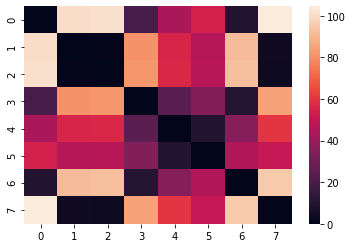

Iteracion 0: Mejor ruta calculada para 8 nodos para una distancia de 145.440637
[0 6 0 6 3 6 1 7]


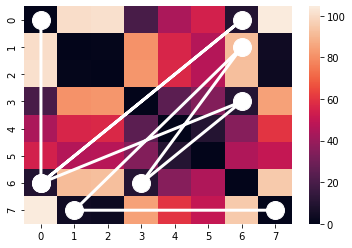

Iteracion 1: Mejor ruta calculada para 3 nodos para una distancia de 104.489200
[0 4 7]


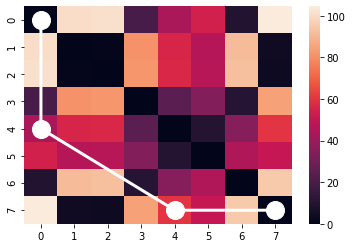

In [ ]:
mejor=[]

mejor.append(main())




In [ ]:
mejor


[[array([0, 6, 0, 6, 3, 6, 1, 7]), array([0, 4, 7])]]

In [ ]:
type(mejor[0][0])

numpy.ndarray

In [ ]:
resultadoB=[]
for x in mejor[0][0]:
  resultadoB.append(x)

In [ ]:
resultadoB

[0, 6, 0, 6, 3, 6, 1, 7]

In [ ]:
Final

[[-1.048744, -79.490965],
 [-1.0524124881444552, -80.39574432610597],
 [-1.0595623776779155, -80.40277557367499],
 [-1.06557978024889, -79.66811153341658],
 [-1.0541536963629856, -79.88963498873258],
 [-1.069870233759869, -79.97876789184207],
 [-1.0703081303294995, -79.57326229225873],
 [-1.072718, -80.430199]]

In [ ]:
res=[]
for i in resultadoB:
    res.append(Final[i])
res

[[-1.048744, -79.490965],
 [-1.0703081303294995, -79.57326229225873],
 [-1.048744, -79.490965],
 [-1.0703081303294995, -79.57326229225873],
 [-1.06557978024889, -79.66811153341658],
 [-1.0703081303294995, -79.57326229225873],
 [-1.0524124881444552, -80.39574432610597],
 [-1.072718, -80.430199]]

In [ ]:
dfC= pd.DataFrame(res, columns = ['Latitud','longitud'])
print(dfA)

    Latitud   longitud
0 -1.048744 -79.490965
1 -1.072718 -80.430199
2 -1.059562 -80.402776
3 -1.072718 -80.430199
4 -1.052412 -80.395744
5 -1.072718 -80.430199
6 -1.059562 -80.402776
7 -1.072718 -80.430199


In [ ]:
#visualizazion final del mapa

mapa = folium.Map(location=[-1.0887419136893897, -80.0061327741165], zoom_start=10, tiles="Stamen Terrain")
points2=[]
tooltip = "Ubicacion"
for lat,long in zip(dfC.Latitud,dfC.longitud):
    folium.Marker([lat,long],popup=str(lat)+str(long), tooltip=tooltip).add_to(mapa)

for i in range(len(dfC.Latitud)):
    points2.append((dfC.Latitud[i], dfC.longitud[i]))

#print(dfB)

folium.PolyLine(points2,
                color='RED',
                dash_array='10').add_to(mapa)

mapa